### # 한글 깨짐 현상 방지

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

### # 세팅

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('seaborn')
sns.set(font_scale = 2.5)
%matplotlib inline

In [ ]:
import matplotlib
from matplotlib import font_manager, rc
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [ ]:
df_train = pd.read_csv("../gdrive/MyDrive/EDA/body.csv")
df_valid = pd.read_csv("../gdrive/MyDrive/EDA/valid_body.csv")

---
1.   데이터를 저장할 때 각 영상마다 있는 평균 16개의 frame을 각각 하나의 row로 저장해줌.(즉 영상 하나당 16개의 row가 나오는 셈)
2.   EDA할 때 평균 프레임 16으로 나누는 것 보다 같은 frame의 row를 합쳐서 EDA하는게 더 정확할 것 같아서(영상 단위로 보는게 나을 것 같아서) 밑에 필요한 column만 뽑아내고 중복 제거하는 코드를 짬. 
---
  

In [ ]:
t = df_train.columns
[x for x in t if "view" not in x ]

['type',
 'type_info.key',
 'type_info.type',
 'type_info.pose',
 'type_info.exercise',
 'condition0',
 'value0',
 'condition1',
 'value1',
 'condition2',
 'value2',
 'condition3',
 'value3',
 'condition4',
 'value4',
 'frame']

In [ ]:
train_eda = df_train[['type', 'frame', 'type_info.exercise']]
train_eda = train_eda.drop_duplicates(['type', 'frame', 'type_info.exercise'])
train_eda

,type,frame,type_info.exercise
0,2,0,스탠딩 사이드 크런치
16,3,1,스탠딩 사이드 크런치
32,4,2,스탠딩 사이드 크런치
48,6,3,스탠딩 사이드 크런치
64,7,4,스탠딩 사이드 크런치
...,...,...,...
246751,628,15456,Y - Exercise
246767,629,15457,Y - Exercise
246783,630,15458,Y - Exercise
246799,631,15459,Y - Exercise


In [ ]:
valid_eda = df_valid[['type', 'frame', 'type_info.exercise']]
valid_eda = valid_eda.drop_duplicates(['type', 'frame', 'type_info.exercise'])
valid_eda

,type,frame,type_info.exercise
0,473,0,라잉 레그 레이즈
16,474,1,라잉 레그 레이즈
32,475,2,라잉 레그 레이즈
48,476,3,라잉 레그 레이즈
64,477,4,라잉 레그 레이즈
...,...,...,...
17840,628,1115,Y - Exercise
17856,629,1116,Y - Exercise
17872,630,1117,Y - Exercise
17888,631,1118,Y - Exercise


### # 데이터 오류
-> 각 영상마다 숫자번호를 붙여주는 방식으로 영상을 구분하는 코드를 짬<br/>
-> 숫자번호는 0부터 시작해서 이 번호를 사용했을 시 +1을 해주는 방식이었음<br/>
-> 중간 중간 숫자번호가 연속적이지 않고 띄엄띄엄 있음을 발견함<br/>
-> 데이터를 확인하니 null데이터가 존재했음<br/>

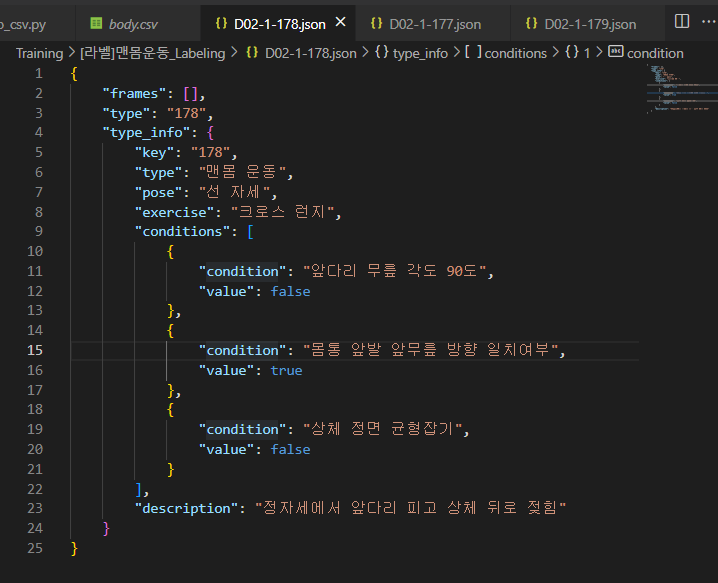

위 사진은 976번째에 해당하는 파일<br/>
frames를 보면 좌표값이 없는걸 확인할 수 있음.

In [ ]:
# 영상 번호가 연속적이지 않은 부분을 확인하는 코드
prev = 0
for i in train_eda["frame"].sort_index():
  if i>0:
    if i != prev+1:
      print(i, prev)
    prev = i

977 975
1254 1252
1450 1448
1673 1671
2103 2101
2369 2367
5690 5681


### # train데이터 확인

In [ ]:
df_train.head()

,view1.pts.Left Ear.x,view1.pts.Left Ear.y,view1.pts.Left Eye.x,view1.pts.Left Eye.y,view1.pts.Right Ear.x,view1.pts.Right Ear.y,view1.pts.Right Eye.x,view1.pts.Right Eye.y,view1.pts.Nose.x,view1.pts.Nose.y,...,value0,condition1,value1,condition2,value2,condition3,value3,condition4,value4,frame
0,1094,334,1122,345,1116,345,1122,357,1117,362,...,False,시선 정면 유지,True,수축시 무릎과 팔꿈치가 충분히 가까움,True,무릎이 몸통 측면에서 올라오는지 여부,True,양 손이 머리 뒤에 위치,True,0
1,1119,348,1125,387,1125,351,1128,386,1121,395,...,False,시선 정면 유지,True,수축시 무릎과 팔꿈치가 충분히 가까움,True,무릎이 몸통 측면에서 올라오는지 여부,True,양 손이 머리 뒤에 위치,True,0
2,1052,320,1069,320,1095,306,1095,315,1085,315,...,False,시선 정면 유지,True,수축시 무릎과 팔꿈치가 충분히 가까움,True,무릎이 몸통 측면에서 올라오는지 여부,True,양 손이 머리 뒤에 위치,True,0
3,1127,349,1131,386,1085,377,1113,396,1115,408,...,False,시선 정면 유지,True,수축시 무릎과 팔꿈치가 충분히 가까움,True,무릎이 몸통 측면에서 올라오는지 여부,True,양 손이 머리 뒤에 위치,True,0
4,1058,332,1068,335,1095,325,1090,330,1081,335,...,False,시선 정면 유지,True,수축시 무릎과 팔꿈치가 충분히 가까움,True,무릎이 몸통 측면에서 올라오는지 여부,True,양 손이 머리 뒤에 위치,True,0


In [ ]:
print(f"columns = {df_train.columns}\n length = {len(df_train)}")

columns = Index(['view1.pts.Left Ear.x', 'view1.pts.Left Ear.y', 'view1.pts.Left Eye.x',
       'view1.pts.Left Eye.y', 'view1.pts.Right Ear.x',
       'view1.pts.Right Ear.y', 'view1.pts.Right Eye.x',
       'view1.pts.Right Eye.y', 'view1.pts.Nose.x', 'view1.pts.Nose.y',
       ...
       'value0', 'condition1', 'value1', 'condition2', 'value2', 'condition3',
       'value3', 'condition4', 'value4', 'frame'],
      dtype='object', length=266)
 length = 246831


In [ ]:
for i in df_train.columns:
  if "view" not in i:
    print(i)

type
type_info.key
type_info.type
type_info.pose
type_info.exercise
condition0
value0
condition1
value1
condition2
value2
condition3
value3
condition4
value4
frame


In [ ]:
for i in df_train.columns:
  if "view" in i:
    print(i)

view1.pts.Left Ear.x
view1.pts.Left Ear.y
view1.pts.Left Eye.x
view1.pts.Left Eye.y
view1.pts.Right Ear.x
view1.pts.Right Ear.y
view1.pts.Right Eye.x
view1.pts.Right Eye.y
view1.pts.Nose.x
view1.pts.Nose.y
view1.pts.Neck.x
view1.pts.Neck.y
view1.pts.Left Shoulder.x
view1.pts.Left Shoulder.y
view1.pts.Left Elbow.x
view1.pts.Left Elbow.y
view1.pts.Left Wrist.x
view1.pts.Left Wrist.y
view1.pts.Left Palm.x
view1.pts.Left Palm.y
view1.pts.Right Shoulder.x
view1.pts.Right Shoulder.y
view1.pts.Right Elbow.x
view1.pts.Right Elbow.y
view1.pts.Right Wrist.x
view1.pts.Right Wrist.y
view1.pts.Right Palm.x
view1.pts.Right Palm.y
view1.pts.Back.x
view1.pts.Back.y
view1.pts.Waist.x
view1.pts.Waist.y
view1.pts.Left Hip.x
view1.pts.Left Hip.y
view1.pts.Left Knee.x
view1.pts.Left Knee.y
view1.pts.Left Ankle.x
view1.pts.Left Ankle.y
view1.pts.Left Foot.x
view1.pts.Left Foot.y
view1.pts.Right Hip.x
view1.pts.Right Hip.y
view1.pts.Right Knee.x
view1.pts.Right Knee.y
view1.pts.Right Ankle.x
view1.pts.Right 

### # valid 데이터 확인

In [ ]:
df_valid.head()

,view1.pts.Nose.x,view1.pts.Nose.y,view1.pts.Left Eye.x,view1.pts.Left Eye.y,view1.pts.Right Eye.x,view1.pts.Right Eye.y,view1.pts.Left Ear.x,view1.pts.Left Ear.y,view1.pts.Right Ear.x,view1.pts.Right Ear.y,...,value0,condition1,value1,condition2,value2,condition3,value3,condition4,value4,frame
0,1285,603,1311,623,1272,686,1303,649,1262,666,...,True,허벅지와 종아리 각도 고정,True,이완 시 다리 긴장유지,True,고개 숙임 여부,True,0,0,0
1,1286,603,1310,623,1272,686,1304,639,1259,666,...,True,허벅지와 종아리 각도 고정,True,이완 시 다리 긴장유지,True,고개 숙임 여부,True,0,0,0
2,1291,604,1300,619,1312,621,1300,653,1260,669,...,True,허벅지와 종아리 각도 고정,True,이완 시 다리 긴장유지,True,고개 숙임 여부,True,0,0,0
3,1294,605,1299,615,1316,625,1300,653,1264,667,...,True,허벅지와 종아리 각도 고정,True,이완 시 다리 긴장유지,True,고개 숙임 여부,True,0,0,0
4,1292,603,1314,628,817,287,781,305,1262,671,...,True,허벅지와 종아리 각도 고정,True,이완 시 다리 긴장유지,True,고개 숙임 여부,True,0,0,0


In [ ]:
print(f"columns = {df_valid.columns}\n length = {len(df_valid)}")

columns = Index(['view1.pts.Nose.x', 'view1.pts.Nose.y', 'view1.pts.Left Eye.x',
       'view1.pts.Left Eye.y', 'view1.pts.Right Eye.x',
       'view1.pts.Right Eye.y', 'view1.pts.Left Ear.x', 'view1.pts.Left Ear.y',
       'view1.pts.Right Ear.x', 'view1.pts.Right Ear.y',
       ...
       'value0', 'condition1', 'value1', 'condition2', 'value2', 'condition3',
       'value3', 'condition4', 'value4', 'frame'],
      dtype='object', length=266)
 length = 17920


## 1. 어떤 운동 종목들이 있는지 확인하기(exercise)

In [ ]:
tmp = train_eda["type_info.exercise"].value_counts()
print(f"총 운동종목 : {len(tmp)}")

총 운동종목 : 21


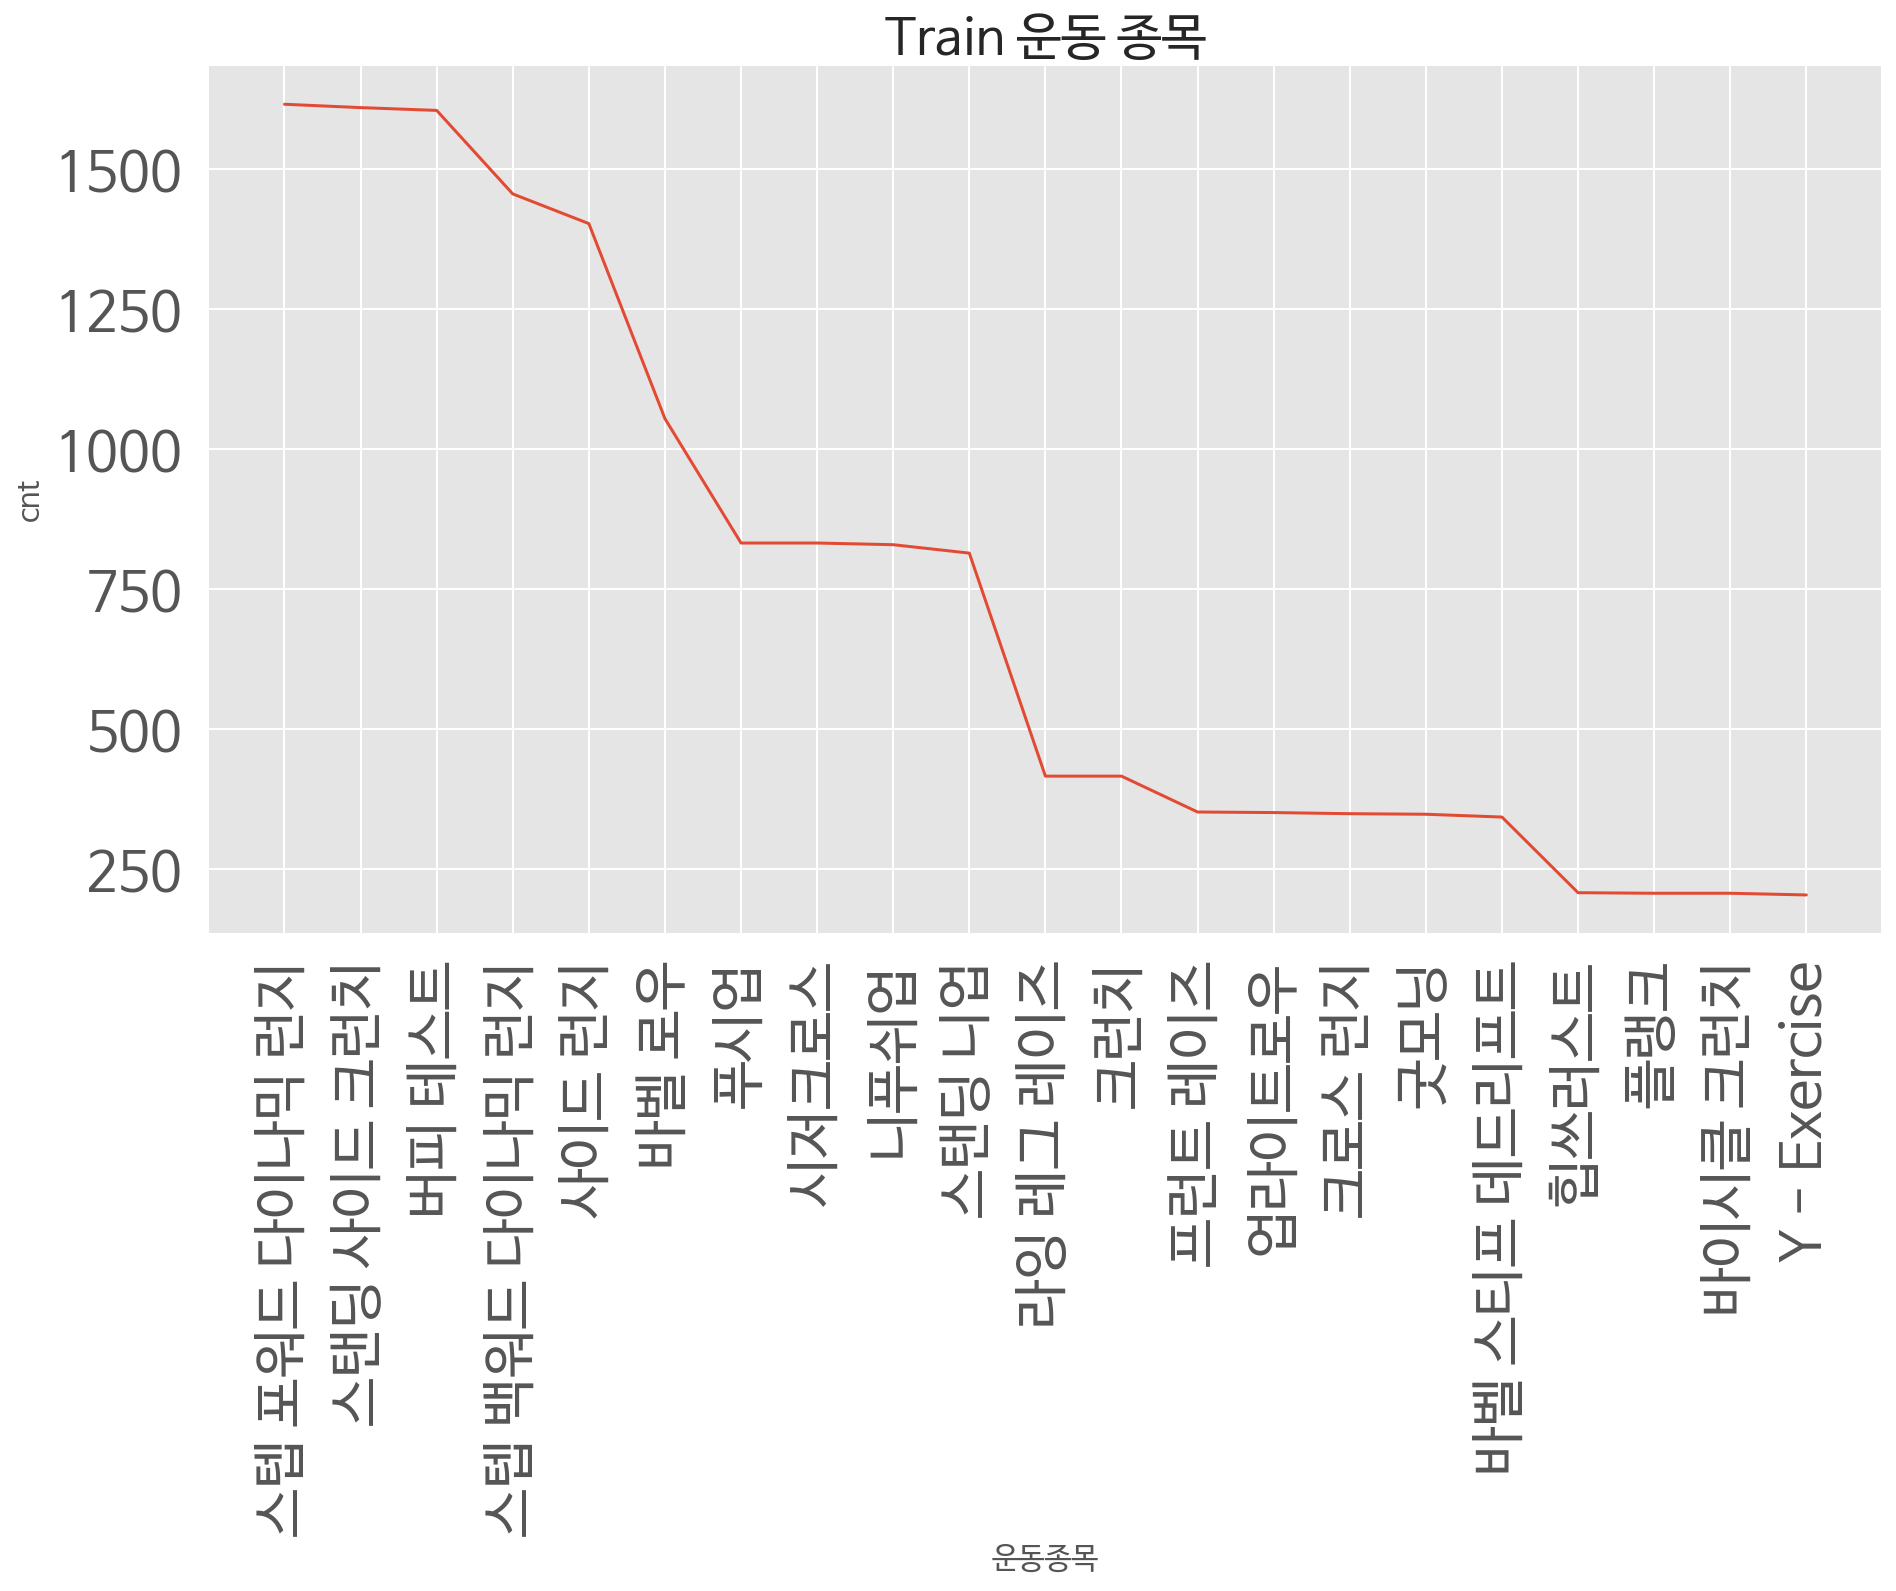

In [ ]:
tmp = train_eda["type_info.exercise"].value_counts()
fig = plt.figure(figsize=(15,8))
plt.plot(tmp)
plt.title("Train 운동 종목", fontsize = 25)
plt.xlabel("운동종목", fontsize =15)
plt.ylabel("cnt", fontsize = 15)
plt.xticks(rotation = 90)
fig.show()

In [ ]:
tmp = valid_eda["type_info.exercise"].value_counts()
print(f"총 운동종목 : {len(tmp)}")

총 운동종목 : 9


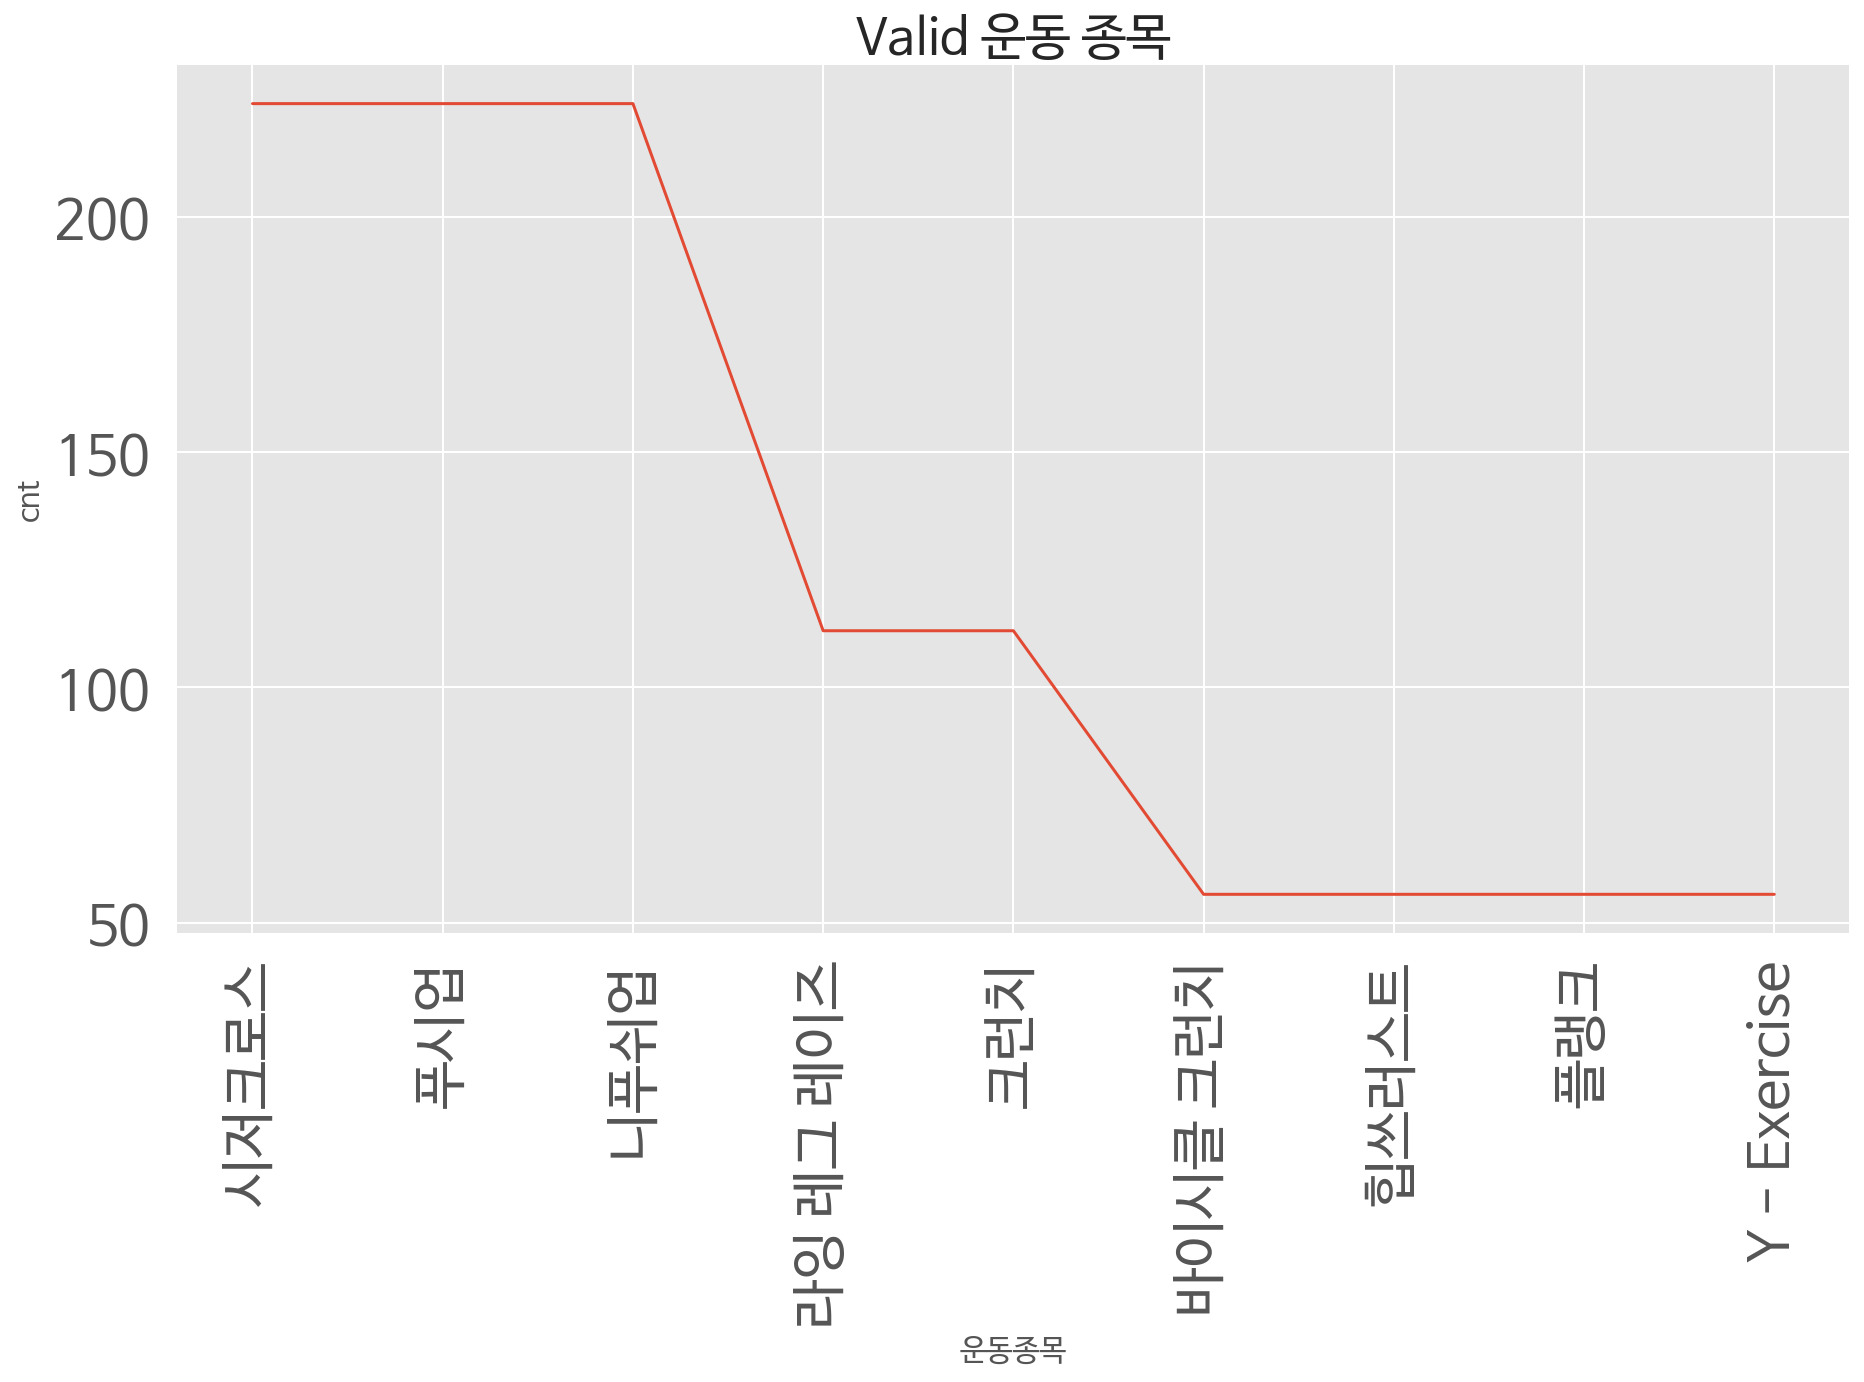

In [ ]:
tmp = valid_eda["type_info.exercise"].value_counts()
fig = plt.figure(figsize=(15,8))
plt.plot(tmp)
plt.title("Valid 운동 종목", fontsize = 25)
plt.xlabel("운동종목", fontsize =15)
plt.ylabel("cnt", fontsize = 15)
plt.xticks(rotation = 90)
fig.show()

---
*   Train데이터에서 가장 많은 데이터를 가진 운동종목과 가장 적은 데이터를 가진 운동종목의 개수가 8배 이상 차이난다. 굉장히 불균형
*   Valid는 가장 많은 것과 가장 적은 것, 4배정도 차이가 난다. 이 역시 불균형
*   Train 운동종목 : 21, Valid 운동종목 : 9 ->` **이 Valid 운동종목을 써서 정확한 Validation을 할 수 있을까?**`

---






## 2. 운동 타입들 확인하기(Type)

---
Train

---

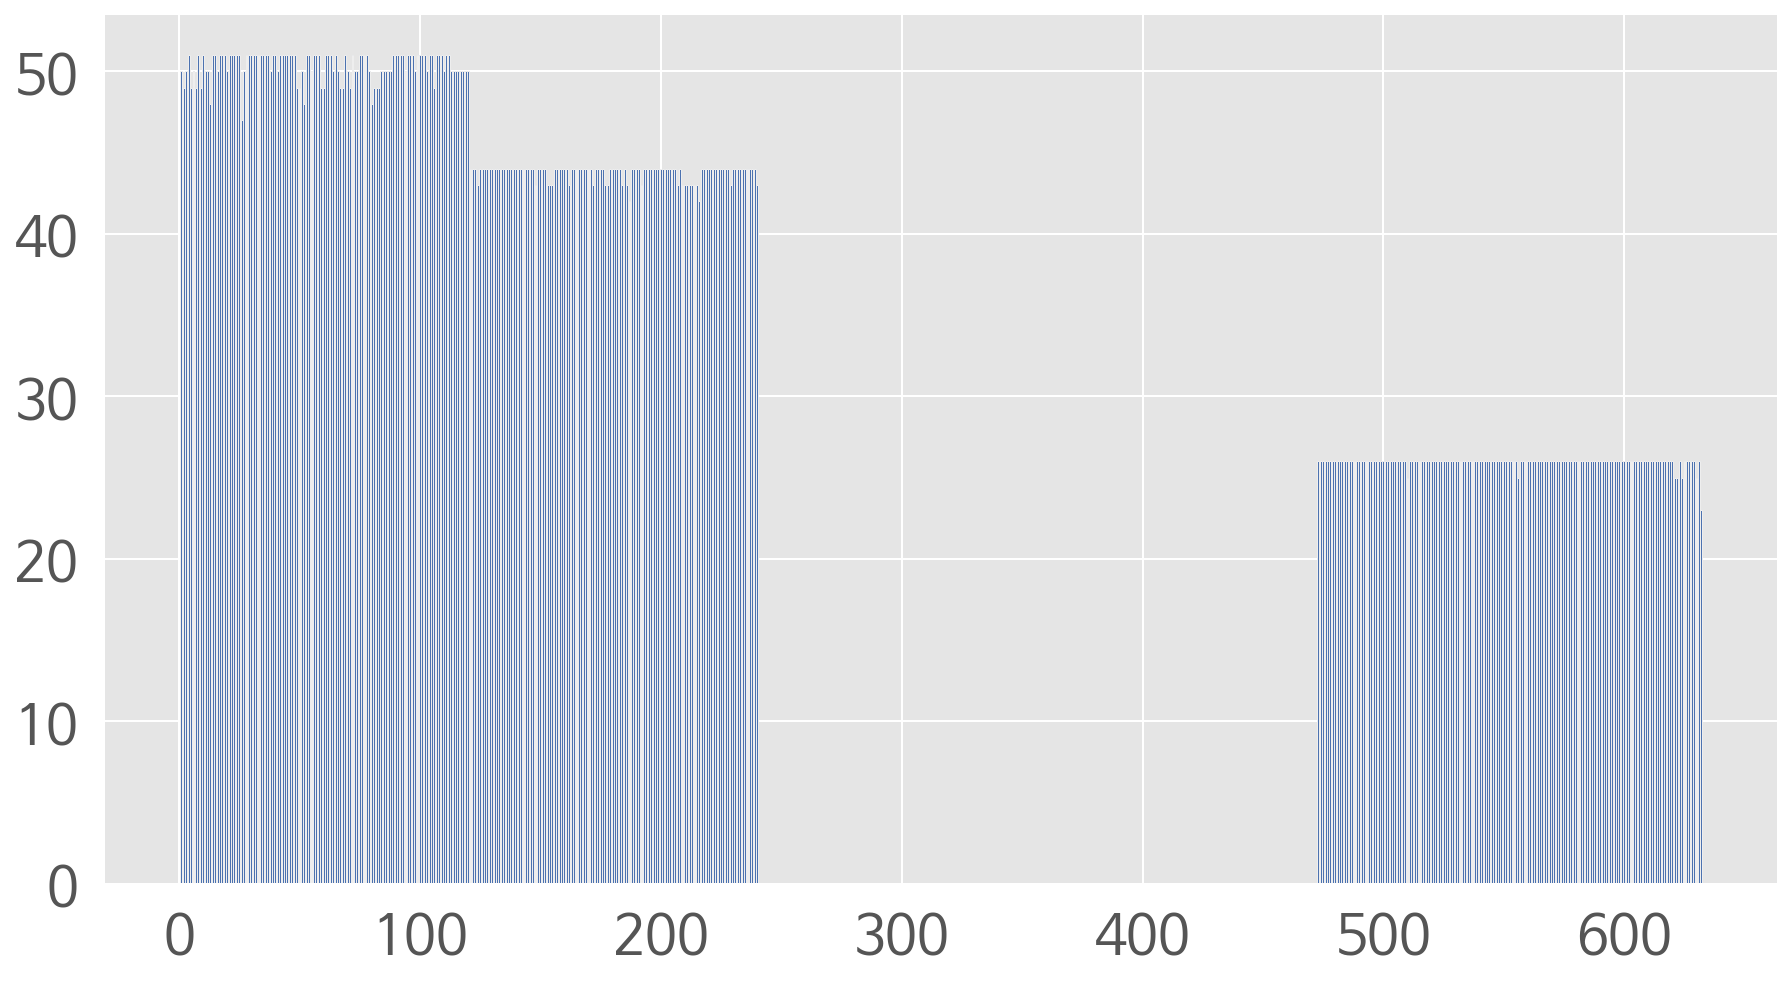

In [ ]:
# 아니근데 왜 색을 못바꾸지...????
tmp = train_eda["type"].value_counts().sort_index()
fig = plt.figure(figsize=(15,8))
plt.bar(list(set(train_eda["type"].values)), list(tmp), color="b")
plt.show()

In [ ]:
len(train_eda[train_eda["type"] == 1])

50

In [ ]:
# 최대값, 최소값
train_eda["type"].value_counts()

93     51
61     51
76     51
75     51
72     51
       ..
556    25
624    25
622    25
621    25
632    23
Name: type, Length: 400, dtype: int64

In [ ]:
# 타입을 오름차순으로 나타냄
train_eda["type"].value_counts().sort_index()

1      50
2      49
3      50
4      51
5      49
       ..
628    26
629    26
630    25
631    26
632    23
Name: type, Length: 400, dtype: int64

In [ ]:
tmp = train_eda[train_eda["type"] > 240]
tmp = tmp[train_eda["type"] < 473]
tmp

,type,frame,type_info.exercise


---
Valid

---

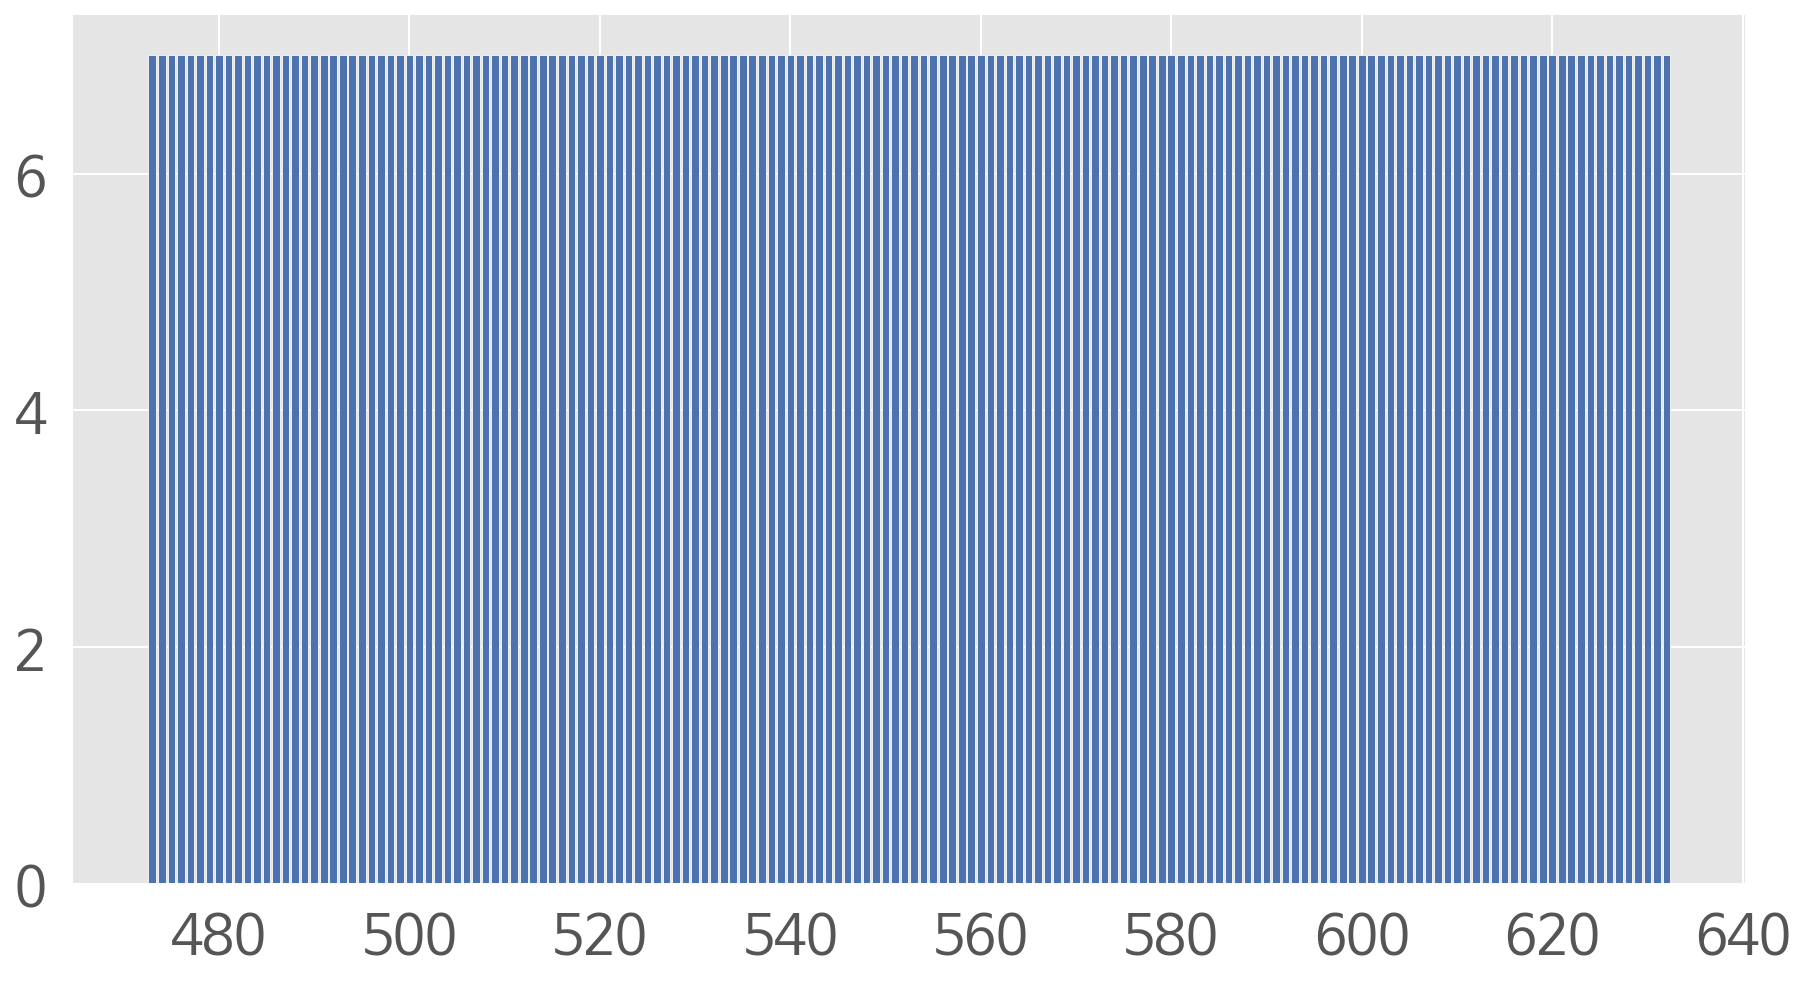

In [ ]:
tmp = valid_eda["type"].value_counts().sort_index()
fig = plt.figure(figsize=(15,8))
plt.bar(list(set(valid_eda["type"].values)), list(tmp), color="b")
plt.show()

In [ ]:
valid_eda["type"].value_counts()

473    7
474    7
575    7
576    7
577    7
      ..
527    7
528    7
529    7
530    7
632    7
Name: type, Length: 160, dtype: int64

In [ ]:
valid_eda["type"].value_counts().sort_index()

473    7
474    7
475    7
476    7
477    7
      ..
628    7
629    7
630    7
631    7
632    7
Name: type, Length: 160, dtype: int64

In [ ]:
print("Valid에 없는 Train Type중 최솟값 : ",min(set(train_eda["type"]) - set(valid_eda["type"])))
print("Valid에 없는 Train Type중 최댓값 : ",max(set(train_eda["type"]) - set(valid_eda["type"])))

Valid에 없는 Train Type중 최솟값 :  1
Valid에 없는 Train Type중 최댓값 :  240


---
***Train***
*   운동 타입이 같은 영상이 많게는 51개, 적게는 23개까지 있음.
*   type이 001면 001타입에 대한 데이터셋이 하나만 있는 줄 알았는데 1만해도 50개가 있음. 즉 타입 1 운동영상이 50개 있음
*   241~472까지의 운동 타입은 없음 -> ***왜지..???*** -> 바벨이나 덤벨 그런쪽 운동 타입이 241부터 472까지 분포해있지 않을까....흠
---
---
***Valid***
*   같은 운동 타입 영상이 7개씩 있음
*   근데 운동 타입이 473~632까지 있음
*   운동타입 1부터 240까지는 우리가 validation을 못한다는 말. 얘네 validation 제대로 안나눈듯
---



## 3. 영상당 프레임 수 확인하기(Frame)

In [ ]:
df_train["frame"].value_counts()

1386    21
6305    17
1396    17
6457    17
1376    17
        ..
185     11
2022    11
1878    11
1899    11
325     10
Name: frame, Length: 15447, dtype: int64

In [ ]:
# 프레임 평균 : 16
df_train.groupby(["frame"])["frame"].count().mean()

15.97921926587687

In [ ]:
df_valid["frame"].value_counts()

1039    17
0       16
752     16
750     16
749     16
        ..
371     16
370     16
369     16
1119    16
1033    15
Name: frame, Length: 1120, dtype: int64

In [ ]:
df_valid.groupby(["frame"])["frame"].count().mean()

16.0

---
Train
*   프레임의 평균은 대략 16
*   최대 프레임은 21. 17들도 다수 보임. 
*   최소 프레임은 10. 11들도 다수 보임.
---
---
valid
*   프레임의 평균은 대략 16
*   최대 프레임은 17.
*   최소 프레임은 15.
---

## 4. 각 프레임당 Active값의 규칙(Active)

In [ ]:
for i in df_train.columns:
  if "active" in i:
    print(i)

view1.active
view2.active
view3.active
view4.active
view5.active


In [ ]:
# "Yes", "No"의 값으로 나온다.
df_train[f"view1.active"].value_counts()

Yes    235710
No      11121
Name: view1.active, dtype: int64

In [ ]:
# 각 프레임마다 view1~view5가 있는데, 각 view는 active값을 가짐. 
# 이 active값이 view마다 다를 수 있는지 확인하는 코드
different_active_within_view = 0

for i in df_train.index:
  tmp = df_train["view1.active"][i]

  for j in range(2, 6):
    if tmp != df_train[f"view{j}.active"][i]:
      different_active_within_view += 1
      break

print("각 frame의 view들의 active가 일치하지 않는 횟수",different_active_within_view)

각 frame의 view들의 active가 일치하지 않는 횟수 0


active의 값이 모든 frame에서 일정한 영상의 수 : 12408
active의 값이 frame마다 다른 영상의 수 : 3039


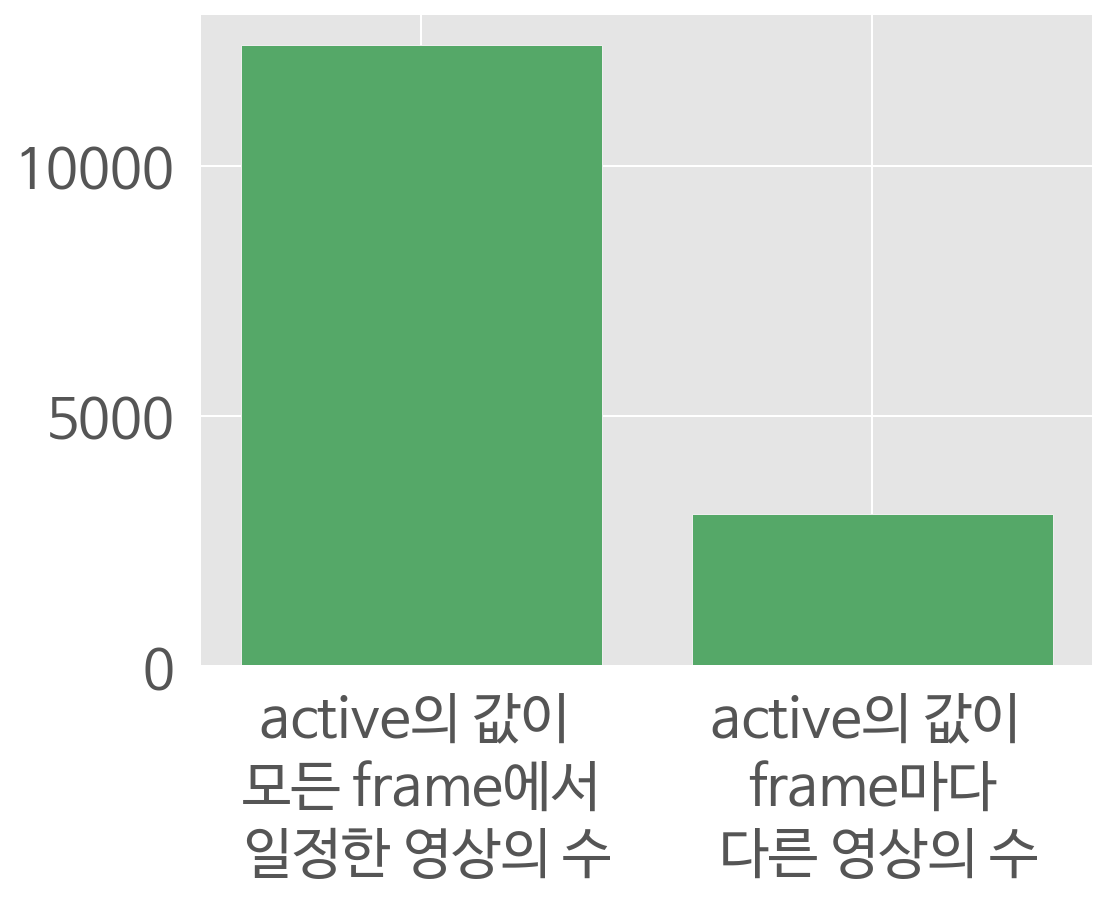

In [ ]:
# 각 영상에서 평균 16개의 프레임마다 active가 다른값을 가지는지, 같은 값을 가지는지
different_active_per_frame = 0
same_active_per_frame = 0

for i in train_eda["frame"].values:
  active_yes = 0
  active_no = 0

  for j in df_train[df_train["frame"] == i].index:
    if df_train["view1.active"][j] == "Yes": active_yes += 1
    elif df_train["view1.active"][j] == "No": active_no += 1

  if active_yes == 0 or active_no == 0: 
    same_active_per_frame += 1
  else: 
    different_active_per_frame += 1

print(f"active의 값이 모든 frame에서 일정한 영상의 수 : {same_active_per_frame}\nactive의 값이 frame마다 다른 영상의 수 : {different_active_per_frame}")
fig = plt.figure(figsize=(8,6))
plt.bar(["active의 값이 \n모든 frame에서\n 일정한 영상의 수", "active의 값이 \nframe마다\n 다른 영상의 수" ], [same_active_per_frame, different_active_per_frame], color = "g")
plt.show()

In [ ]:
a = []
for i in train_eda["frame"].values:
  for location, j in enumerate(df_train[df_train["frame"] == i].index):
    if df_train["view1.active"][j] == "No": a.append(location)
print(" Active No인 경우의 최소 frame값", min(a),"\n","Active No인 경우의 최대frame값", max(a))

 Active No인 경우의 최소 frame값 0 
 Active No인 경우의 최대frame값 16


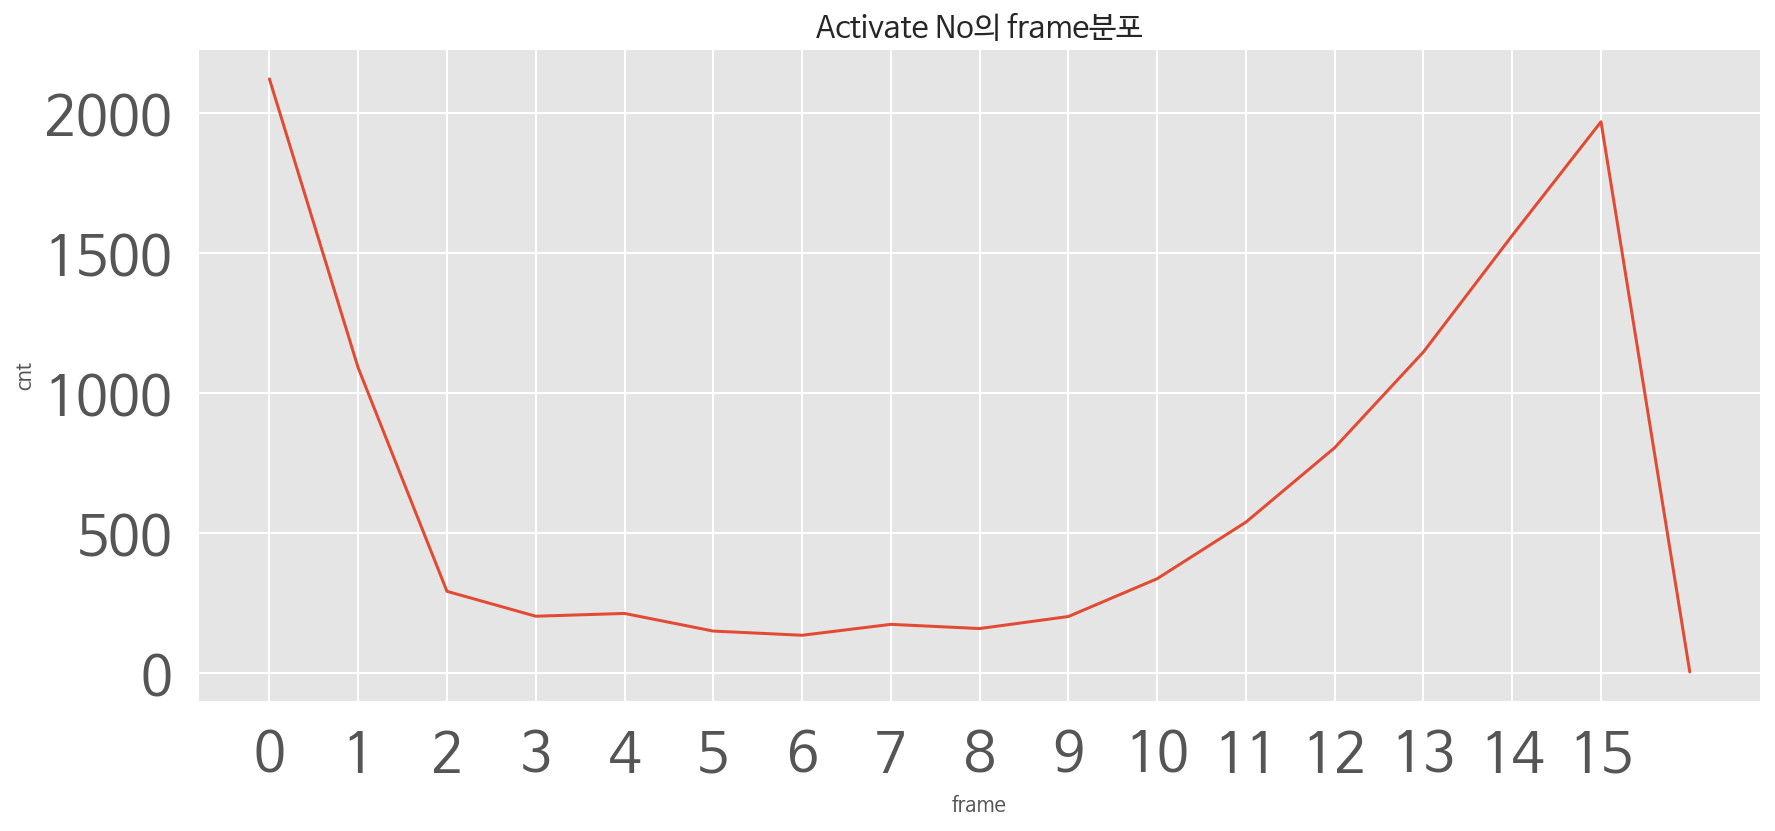

In [ ]:
tmp = pd.DataFrame(a).value_counts().sort_index()
fig = plt.figure(figsize=(14,6))
plt.plot(tmp.values)
plt.xticks(np.arange(0,16))
plt.title("Activate No의 frame분포", fontsize = 15)
plt.xlabel("frame", fontsize =10)
plt.ylabel("cnt", fontsize = 10)
fig.show()

---
*   active는 "Yes","No"의 값을 가진다.
*   각 frame마다 view1~view5가 가지는 active의 값은 모두 같다.
*   "Yes"보다 "No"가 현저하게 적다.
*   active가 모든 frame에서 일정한 영상이 4배정도 더 많다. 
*   일정하지 않은 영상도 yes와 no의 비율이 15:1정도임
*   No의 프레임 분포는 0,1과 12,13,14,15에 편향되어있는것을 볼 수 있다. 
*   active의 의미 : 현재 운동을 하고 있는지 하고있지 않은지? 아니면 현재 몸을 움직이는지 움직이고 있지 않은지? => 예를 들어 플랭크는 운동을 하고 있지만 몸은 움직이고 있지 않다. 

---

In [ ]:
plank_active_yes = df_train[df_train["type_info.exercise"] == "플랭크"][df_train["view1.active"] == "Yes"]
print("플랭크에서 active가 yes인 횟수 : ",len(plank_active_yes))
plank_active_no = df_train[df_train["type_info.exercise"] == "플랭크"][df_train["view1.active"] == "No"]
print("플랭크에서 active가 no인 횟수 : ",len(plank_active_no ))

플랭크에서 active가 yes인 횟수 :  3312
플랭크에서 active가 no인 횟수 :  0


---
플랭크는 운동을 하고 있지만 몸은 움직이지 않는 운동이고, 플랭크 데이터에서 active값은 모두 yes인 것을 볼 수 있다. <br/>
이를 통해 active는 현재 운동을 하고 있는지, 하고 있지 않은지를 나타내는 column인 것 같다. <br/>
우린 운동 시작후 몇초 이상부터 피드백을 해주는 시스템을 도입하거나, 현재 움직임이 운동상태인지, 아닌지를 판단하는 모델을 하나 더 쓸 수 있을 듯 하다. 

---

## 5. view1~5까지의 규칙

In [ ]:
df_train[(df_train["view1.img_key"] == '0') | (df_train["view2.img_key"] == '0')|(df_train["view3.img_key"] == '0')|(df_train["view4.img_key"] == '0')|(df_train["view5.img_key"]  == '0')]

,view1.pts.Left Ear.x,view1.pts.Left Ear.y,view1.pts.Left Eye.x,view1.pts.Left Eye.y,view1.pts.Right Ear.x,view1.pts.Right Ear.y,view1.pts.Right Eye.x,view1.pts.Right Eye.y,view1.pts.Nose.x,view1.pts.Nose.y,...,value0,condition1,value1,condition2,value2,condition3,value3,condition4,value4,frame


In [ ]:
df_train[(df_train["view1.img_key"].isnull() == True)|(df_train["view2.img_key"].isnull() == True)|(df_train["view3.img_key"].isnull() == True)|(df_train["view4.img_key"].isnull() == True)|(df_train["view5.img_key"].isnull() == True)]

,view1.pts.Left Ear.x,view1.pts.Left Ear.y,view1.pts.Left Eye.x,view1.pts.Left Eye.y,view1.pts.Right Ear.x,view1.pts.Right Ear.y,view1.pts.Right Eye.x,view1.pts.Right Eye.y,view1.pts.Nose.x,view1.pts.Nose.y,...,value0,condition1,value1,condition2,value2,condition3,value3,condition4,value4,frame


---
*   정상 데이터는 view1~5가 모두 있는 듯 하다. 
*   null 데이터에서 문제가 발생한것으로 보임

---


## 6. 각 영상당 Pose값의 규칙(Pose)

In [ ]:
for i in df_train.columns:
  if "pose" in i:
    print(i)

type_info.pose


In [ ]:
df_train["type_info.pose"].unique()

array(['선 자세', '누운자세', '엎드린자세'], dtype=object)

pose의 값이 모든 frame에서 일정한 영상의 수 : 15447
pose의 값이 frame마다 다른 영상의 수 : 0


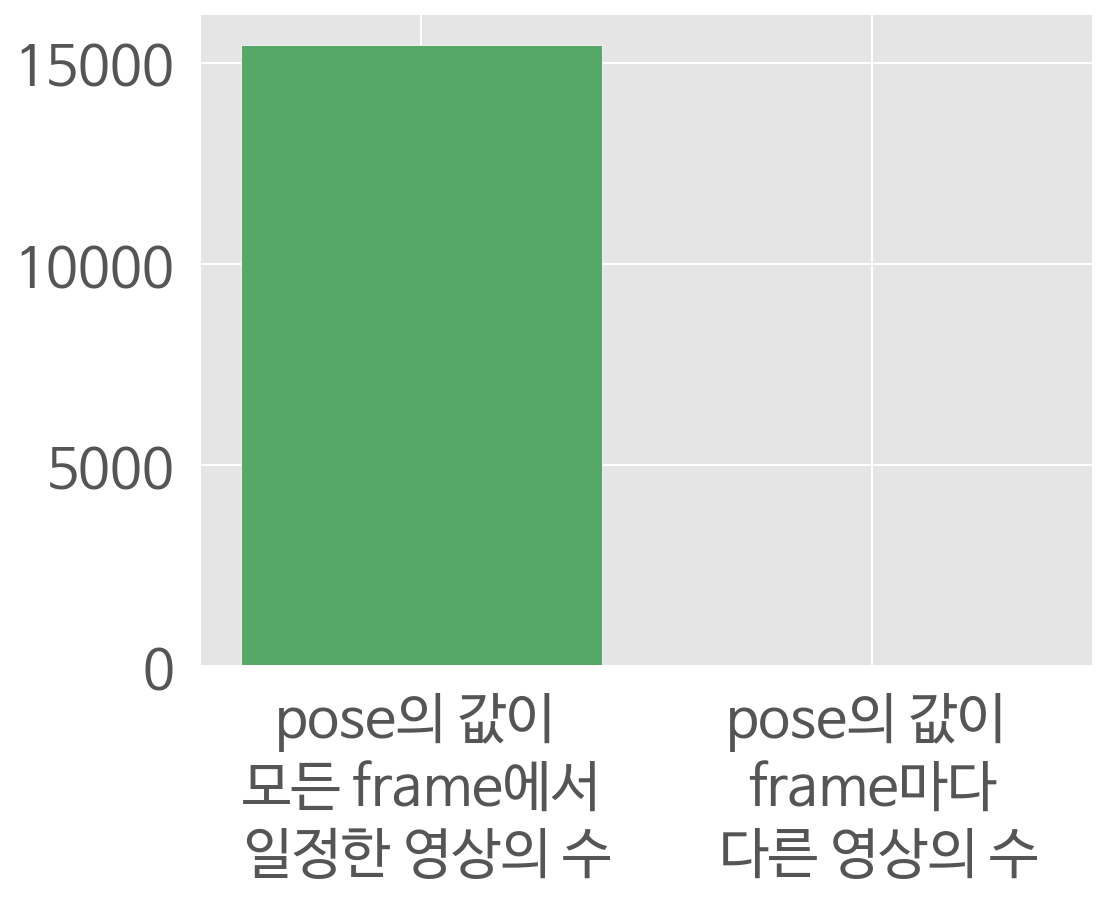

In [ ]:
# 각 영상에서 평균 16개의 프레임마다 Pose가 같은 값을 가지는 지
different_pose_per_video = 0
same_pose_per_video = 0

for i in train_eda["frame"].values:
  if df_train[df_train["frame"] == i]["type_info.pose"].nunique() > 1: different_pose_per_video += 1
  elif df_train[df_train["frame"] == i]["type_info.pose"].nunique() == 1: same_pose_per_video += 1

print(f"pose의 값이 모든 frame에서 일정한 영상의 수 : {same_pose_per_video}\npose의 값이 frame마다 다른 영상의 수 : {different_pose_per_video}")
fig = plt.figure(figsize=(8,6))
plt.bar(["pose의 값이 \n모든 frame에서\n 일정한 영상의 수", "pose의 값이 \nframe마다\n 다른 영상의 수" ], [same_pose_per_video,different_pose_per_video], color = "g")
plt.show()

In [ ]:
# # 노가다코드,, 반성,,,
# for i in train_eda["frame"].values:
#   stand,lie,prostrate = 0,0,0
#   for j in df_train[df_train["frame"] == i].index:
#     if df_train["type_info.pose"][j] == "선 자세": stand+=1
#     elif df_train["type_info.pose"][j] == "누운자세": lie+=1
#     elif df_train["type_info.pose"][j] == "엎드린자세" : prostrate+=1
  
#   if (stand == 0 and lie == 0) or (lie == 0 and prostrate == 0) or (stand == 0 and prostrate == 0): same_pose_per_frame += 1
#   else: different_pose_per_frame += 1

---
*   포즈의 값은 각 영상마다 일정하므로 유의미한 데이터는 아닌 것 같음.
*   각 영상마다 포즈 값은 항상 동일함. 
*   포즈의 값으로는 '선 자세', '누운자세', '엎드린자세' 등이 있음

---

In [ ]:
len(df_train[df_train["type_info.exercise"] == "플랭크"] // 16)

3312

In [ ]:
데이터셋 증강 + 추가